In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nataliegosnell/miniconda3/envs/astroconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def setupkde(order,run,burn):
    ws = np.load('../sf/m'+str(order)+'/output/mix_emcee/run0'+str(run)+'/emcee_chain.npy')
    burned = ws[:, burn:,:]
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    nx, ny = fc.shape
    f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])
    burnedT2 = ws[:, burn:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    return f_omega, T2

In [3]:
all_avail = [106, 107, 109, 110, 113, 114, 116, 118, 119]
no_plots = [101]
ms_forward = np.array(list(set(all_avail) - set(no_plots)), dtype=np.int)
ms = ms_forward[::-1]

In [4]:
pal = sns.dark_palette("#E16560", as_cmap=True)

0
1
2
3
4
5
6
7
8


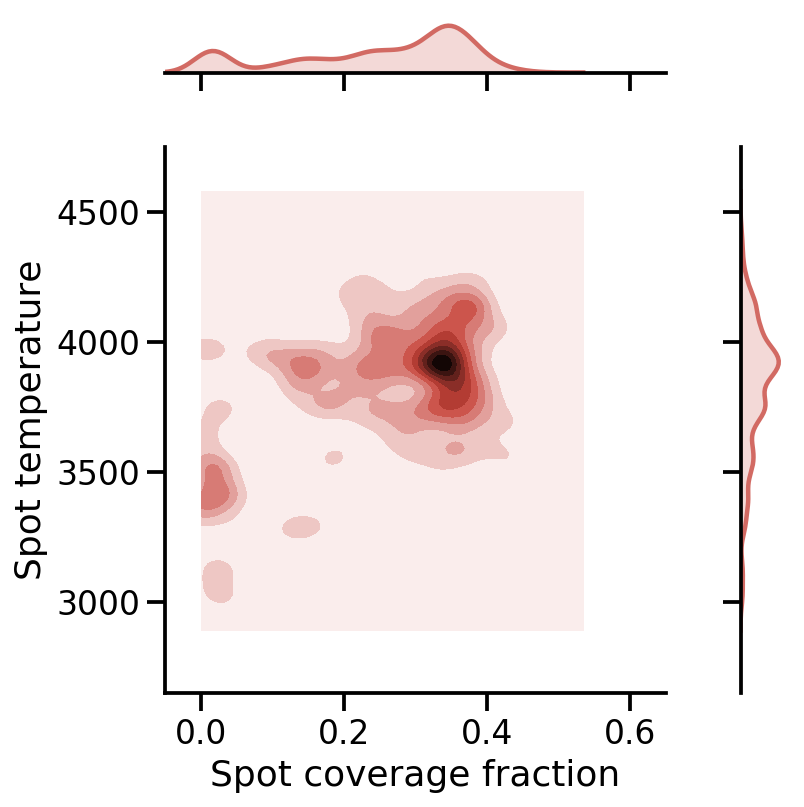

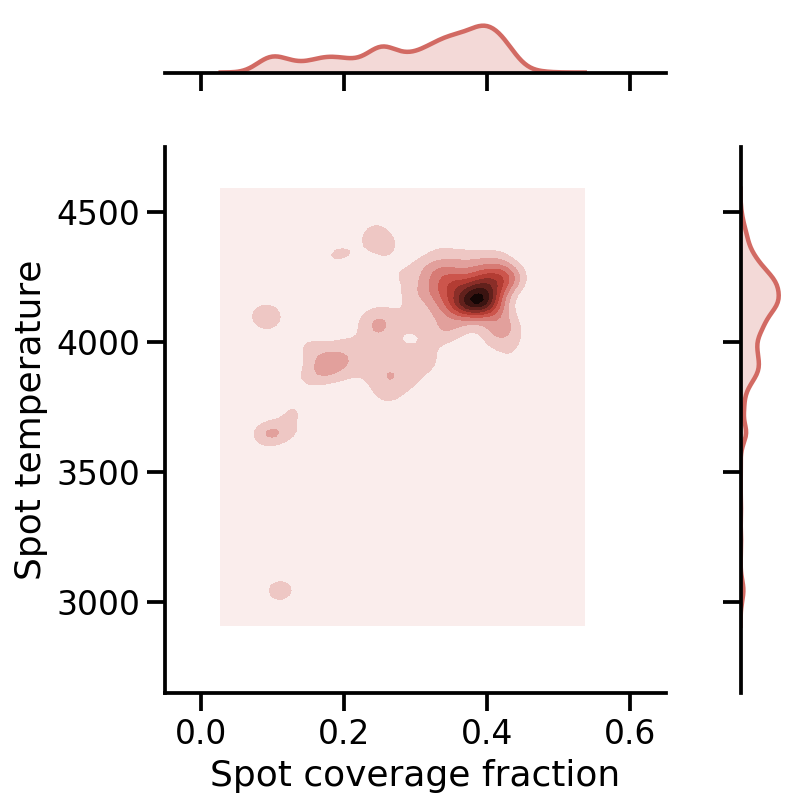

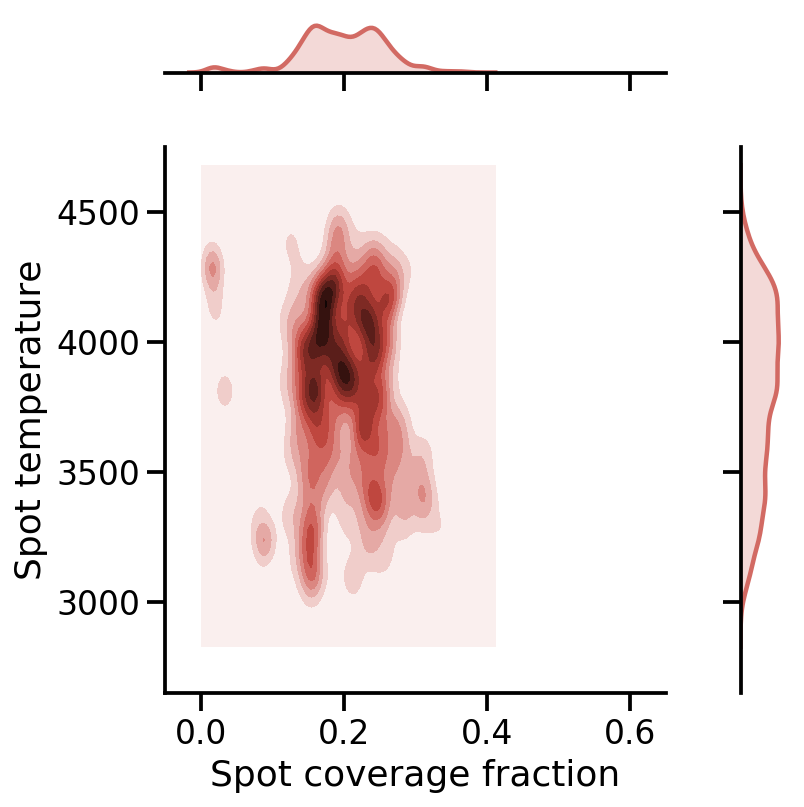

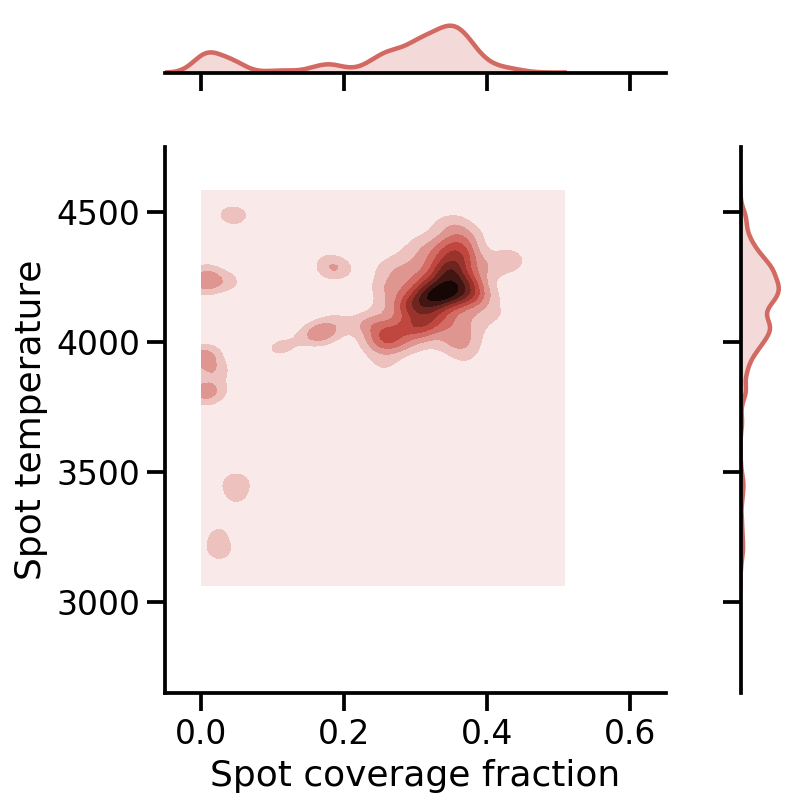

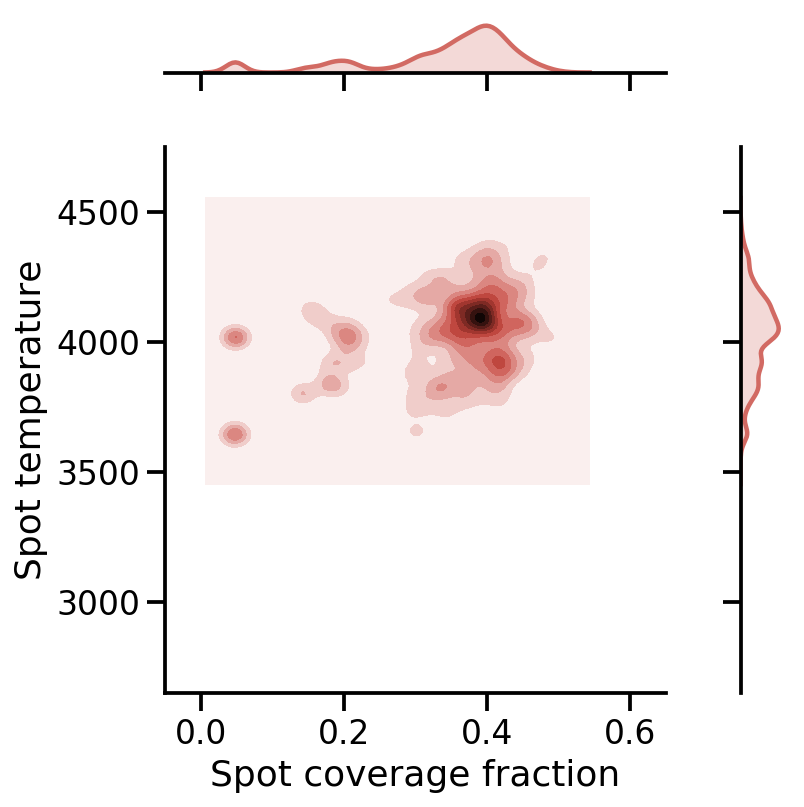

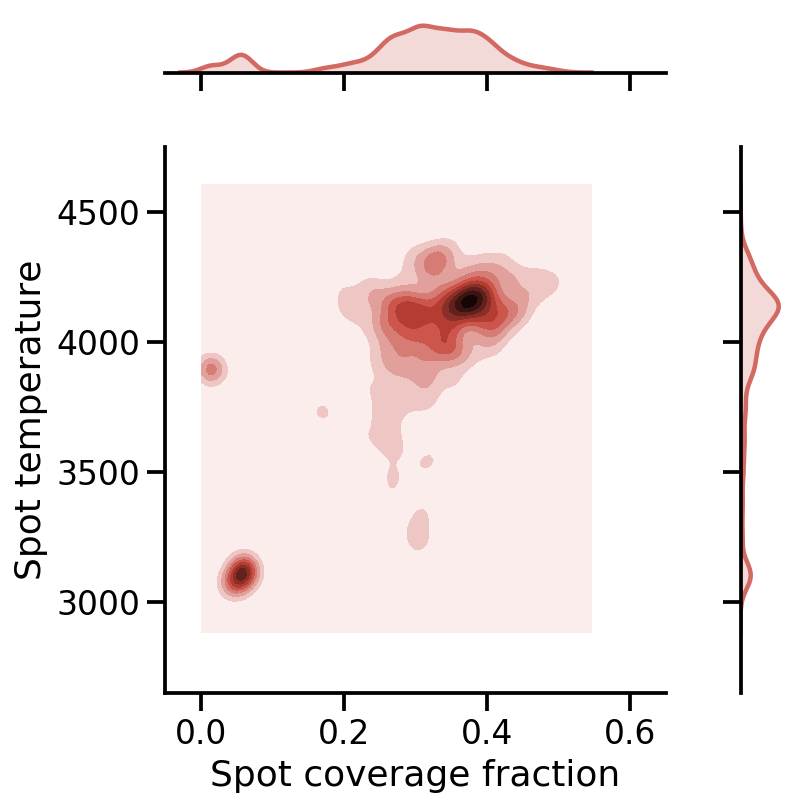

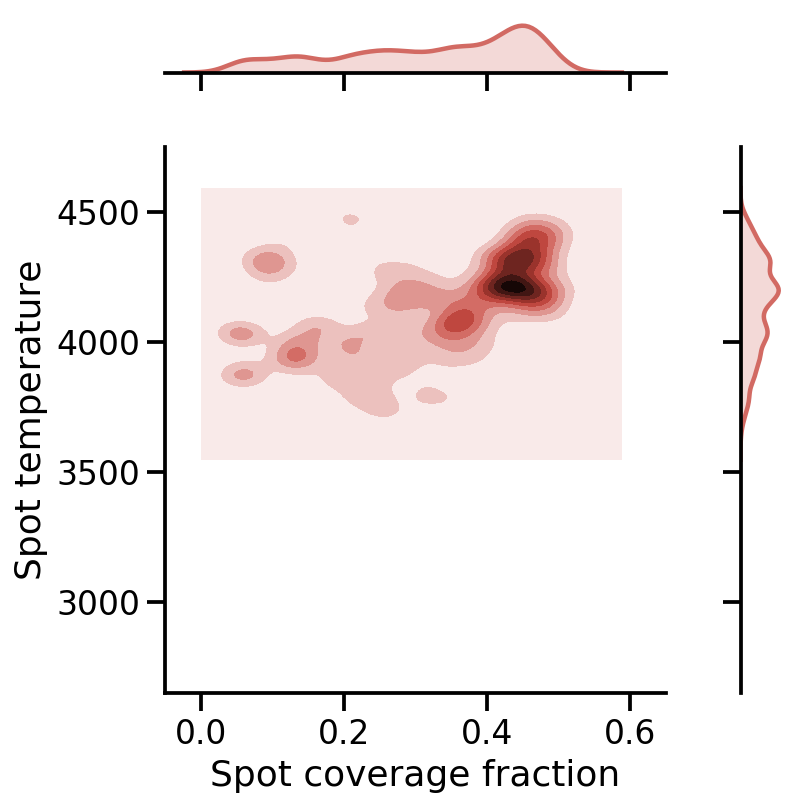

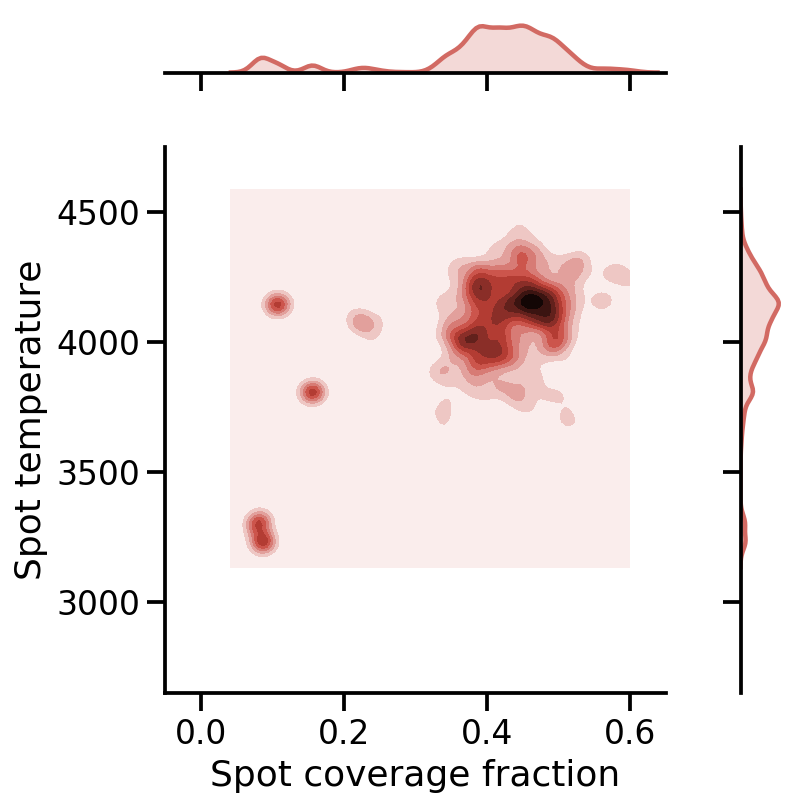

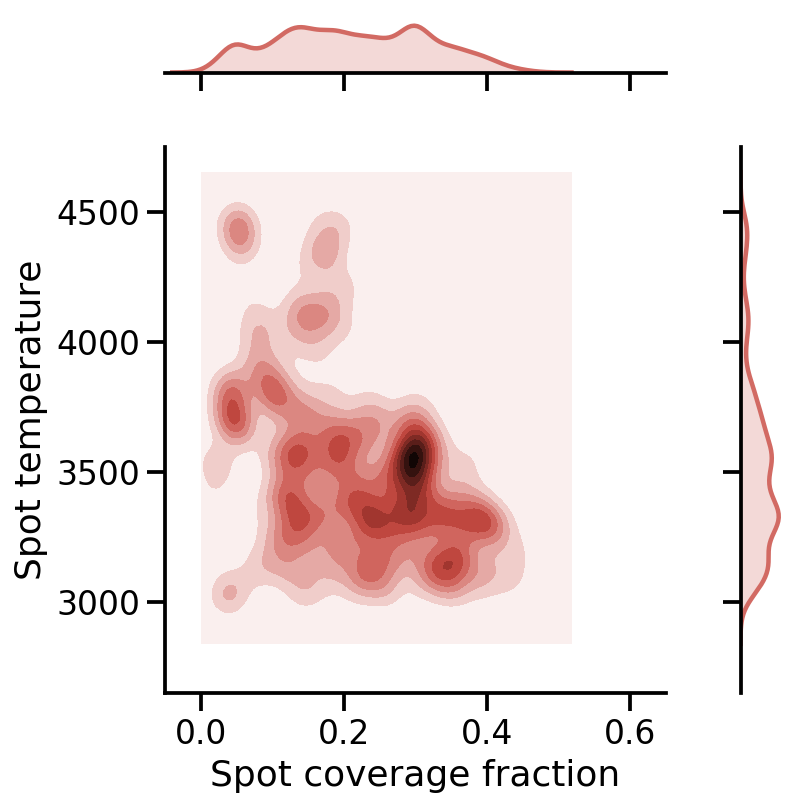

In [161]:
ii = -1

sns.set_context("talk")

for i in range(len(ms)):
    ii += 1
    print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    burned = ws[:, -200:,:]
    #I'm only keeping the last 200 samples because that's what Gully did for the spectra plots
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -200:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    p = sns.jointplot(f_omega, T2, kind='kde', color="#D26A63", clip=((0.0,0.6),(2700,4700)), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    #plt.figure()
    #sns.kdeplot(f_omega, T2, cmap=pal)
    #plt.xlabel("Filling factor")
    #plt.ylabel("Spot temperature (K)")
    p.set_axis_labels("Spot coverage fraction", "Spot temperature")
    #p.ax_joint.text(np.min(f_omega), np.max(T2), "m = {}".format(m))
    plt.tight_layout()
    plt.savefig('../results/figs/Tspot_fillingfactor_m{}_AAS.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)


Let's see what hex bins look like:

0
1
2
3
4
5
6
7
8


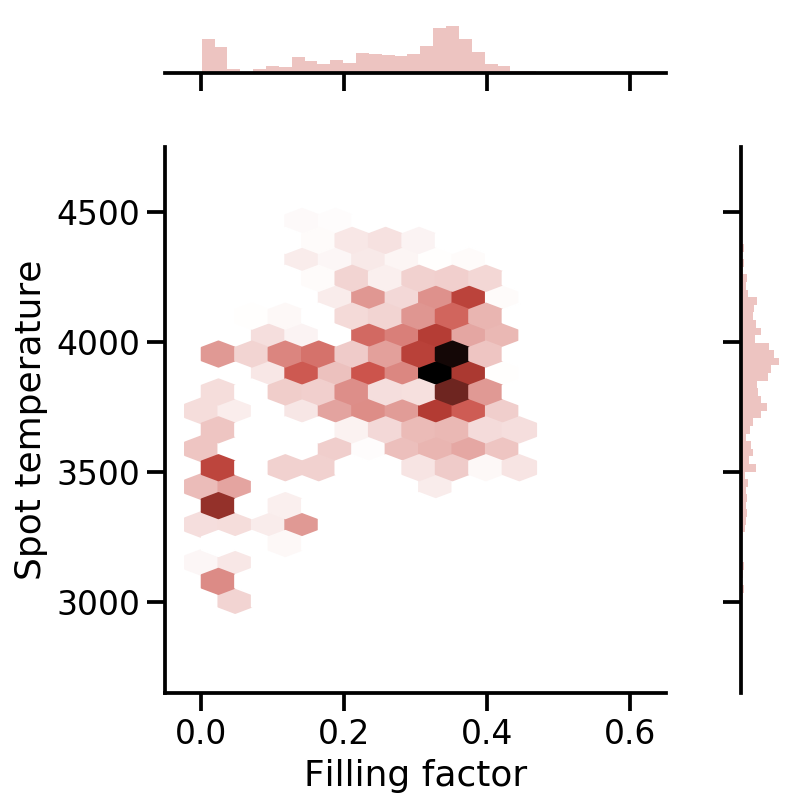

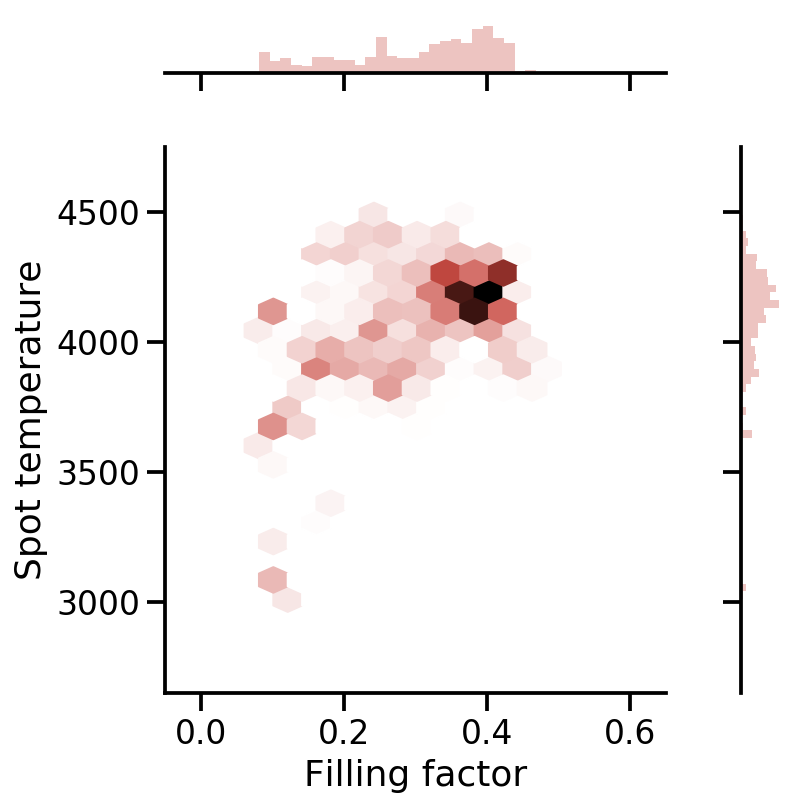

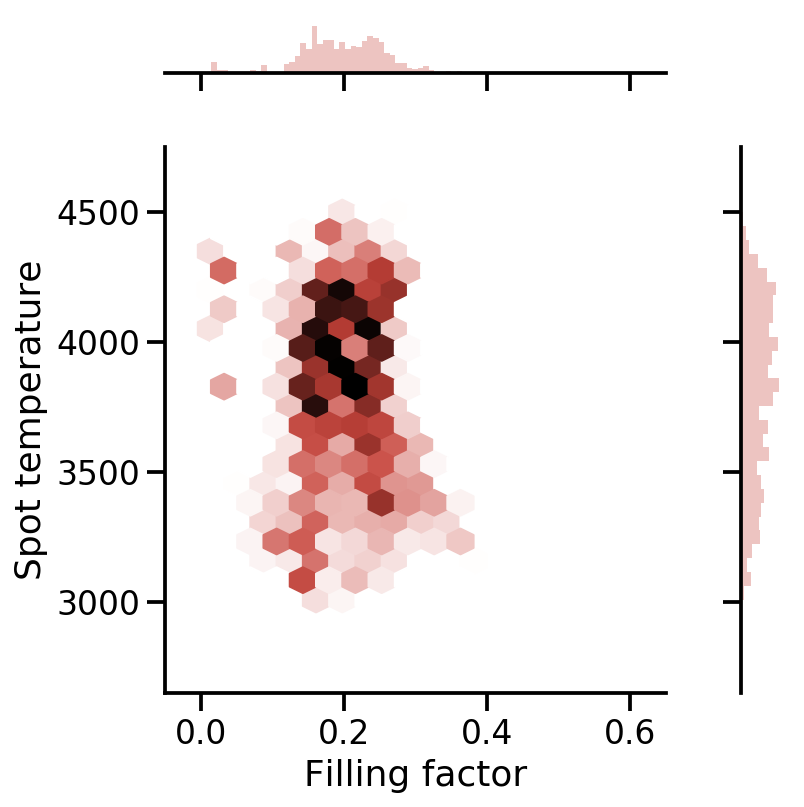

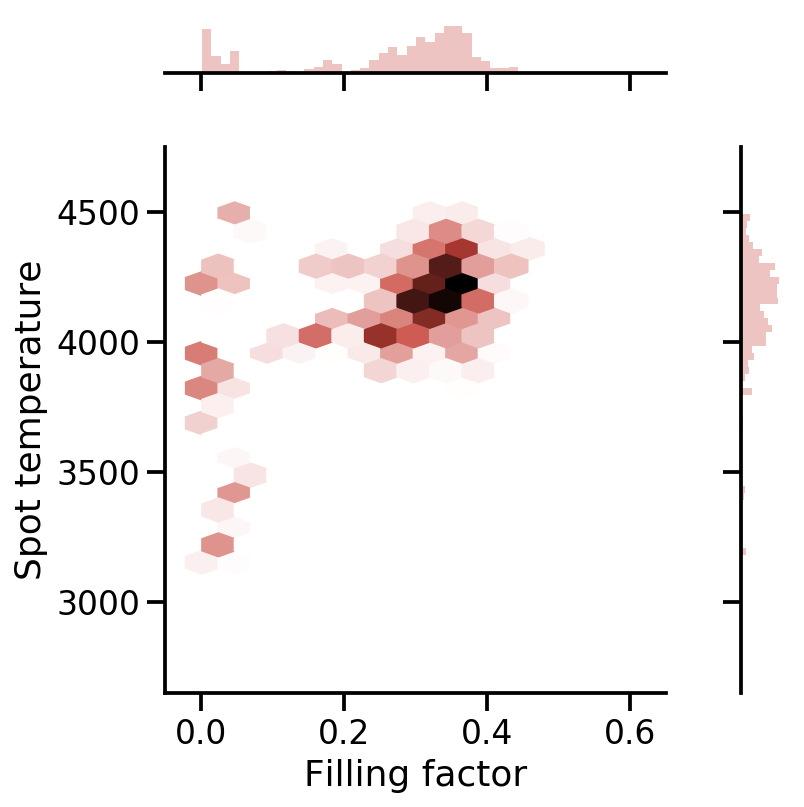

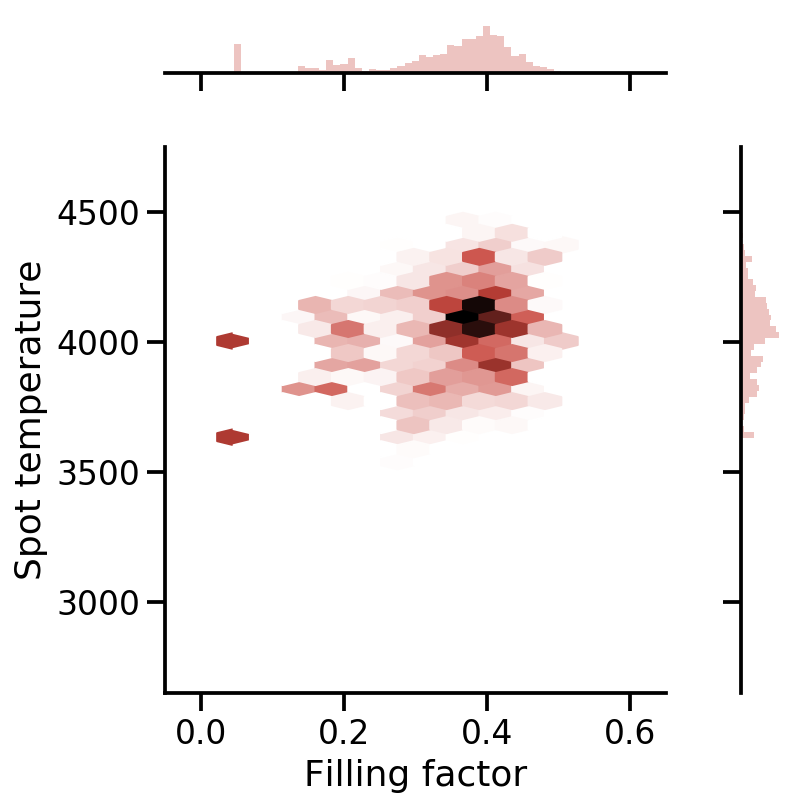

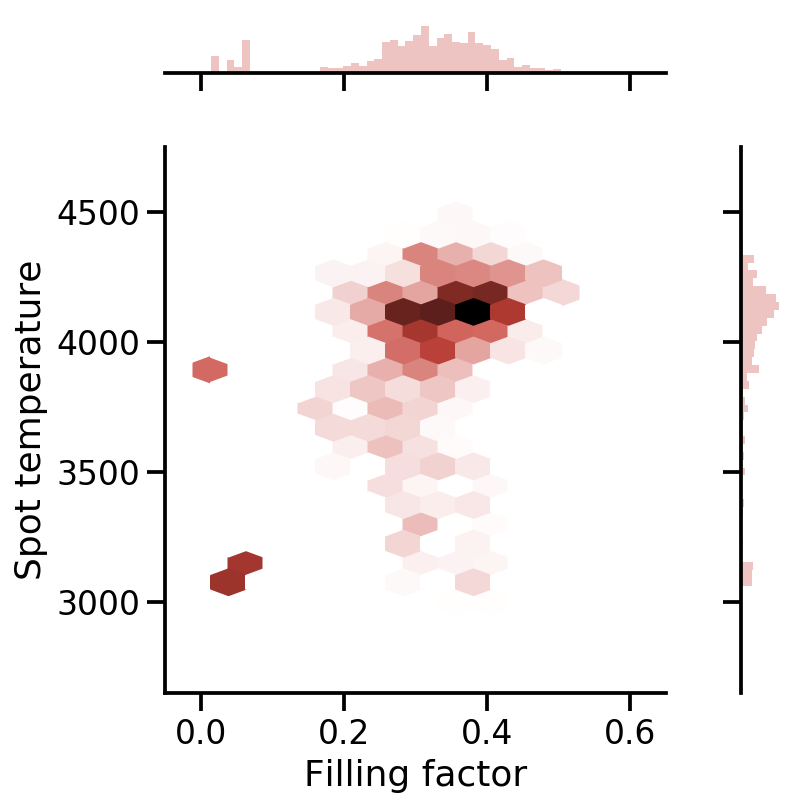

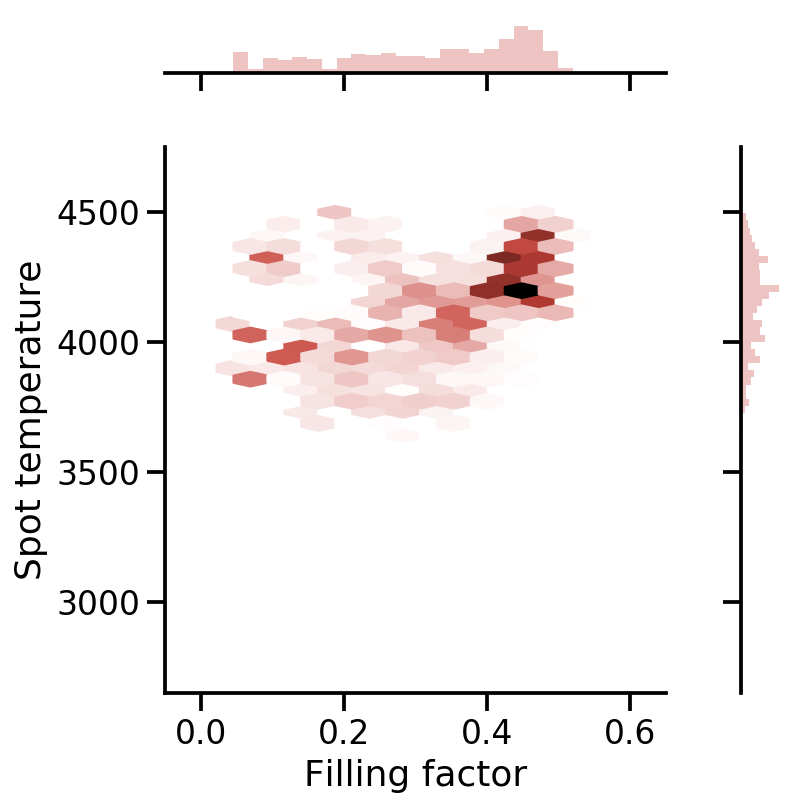

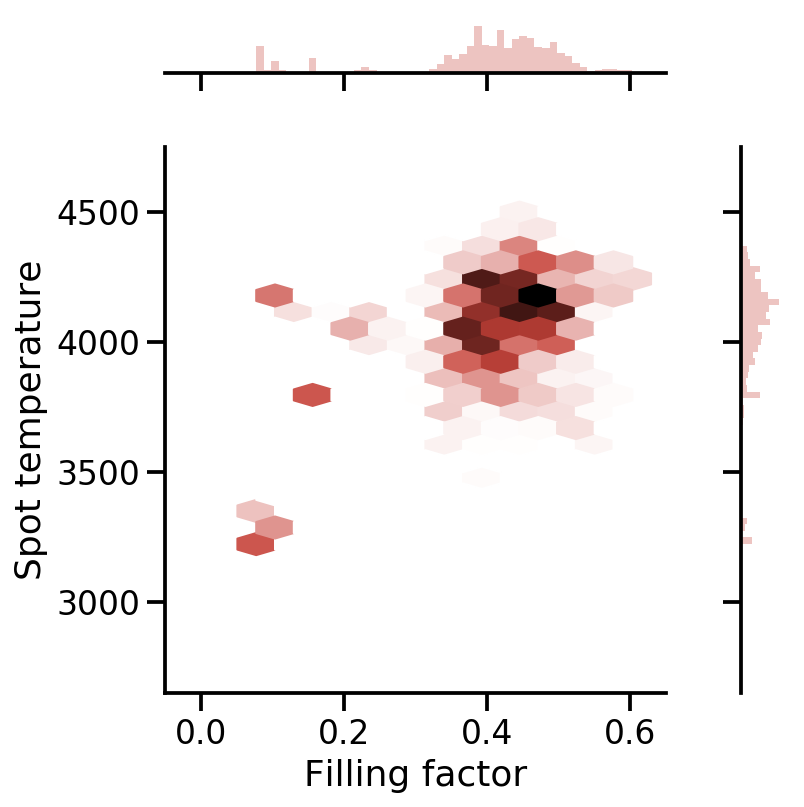

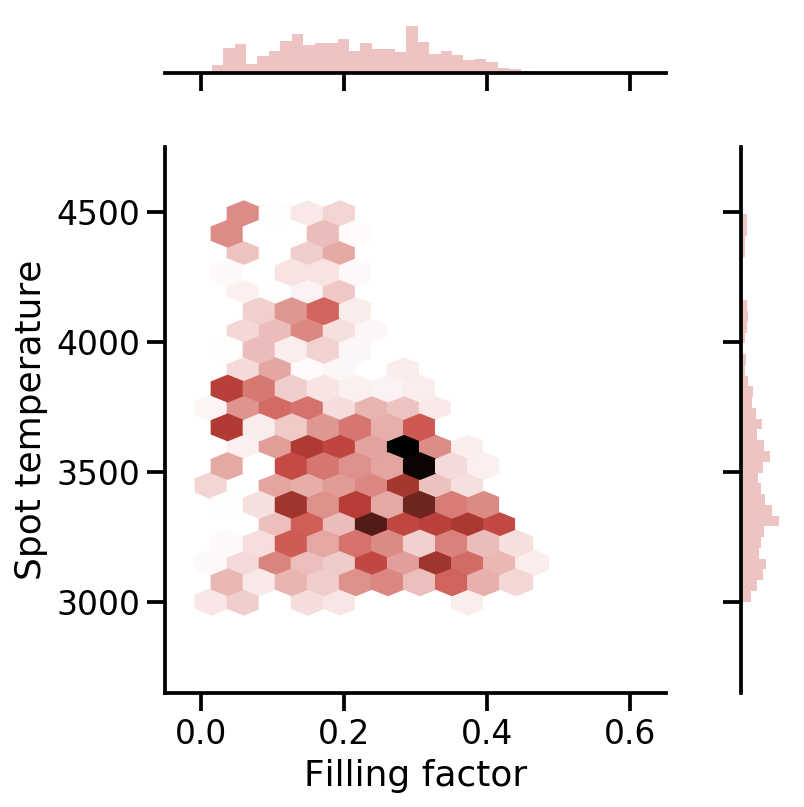

In [34]:
ii = -1

sns.set_context("talk")

for i in range(len(ms)):
    ii += 1
    print(ii)
    m = ms[ii]
    
    try:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run02/emcee_chain.npy".format(m))
    except:
        ws = np.load("../sf/m{:03d}/output/mix_emcee/run01/emcee_chain.npy".format(m))
    burned = ws[:, -200:,:]
    #I'm only keeping the last 200 samples because that's what Gully did for the spectra plots
    xs, ys, zs = burned.shape
    fc = burned.reshape(xs*ys, zs)
    f_omega = 10**fc[:, 7]/(10**fc[:, 7]+10**fc[:, 5])
    burnedT2 = ws[:, -200:, 6] 
    Txs, Tys = burnedT2.shape
    T2 = burnedT2.reshape(Txs*Tys)
    
    #p = sns.jointplot(f_omega, T2, kind='kde', color="#D36C65", clip=((0.0,0.6),(2700,4700)), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    p = sns.jointplot(f_omega, T2, kind='hex', color="#D36C65", gridsize=(10,10), xlim=[-0.05, 0.65], ylim=[2650, 4750])
    #plt.figure()
    #sns.kdeplot(f_omega, T2, cmap=pal)
    #plt.xlabel("Filling factor")
    #plt.ylabel("Spot temperature (K)")
    p.set_axis_labels("Filling factor", "Spot temperature")
    #p.ax_joint.text(np.min(f_omega), np.max(T2), "m = {}".format(m))
    plt.tight_layout()
    #plt.savefig('../document/figures/Tspot_fillingfactor_m{}_AAS.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)
    plt.savefig('../results/figs/Tspot_fillingfactor_m{}_AAS_hex.pdf'.format(m), bbox_inches='tight', dpi=300, transparent=True)


I like the KDE plots better.  

Okay, now let's do light curves

In [5]:
df05 = pd.read_csv('../data/K2/S1063_K2_C05_lightkurve_SFF.csv')
df16 = pd.read_csv('../data/K2/S1063_K2_C16_lightkurve_SFF.csv')
df18 = pd.read_csv('../data/K2/S1063_K2_C18_lightkurve_SFF.csv')

In [9]:
igrins_obs = 57138.64
print("Time between beginning of C5 and IGRINS obs in hours:")
print((np.min(df05.time) + 54833.0 - igrins_obs) * 24)

Time between beginning of C5 and IGRINS obs in hours:
23.3048231882276


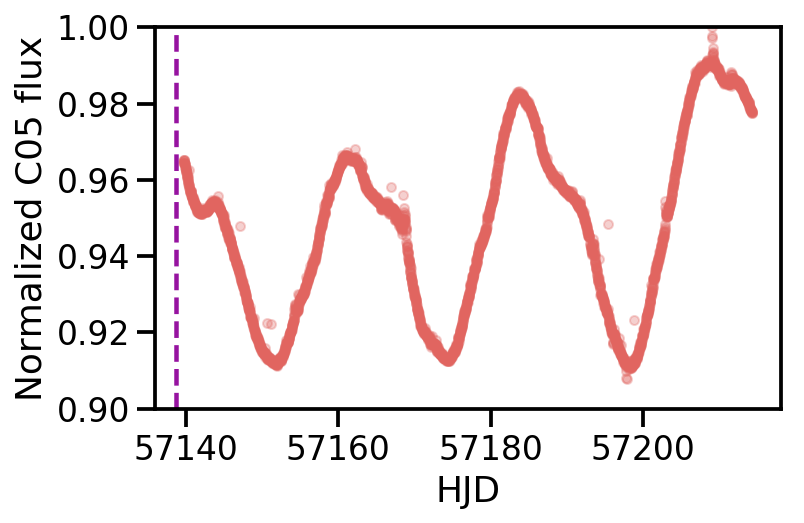

In [133]:
plt.plot(df05.time + 54833, (df05.flux / np.max(df05.flux)), '.', alpha=0.3, color='#E16560')
plt.axvline(igrins_obs, linestyle='dashed', color='#9613A0')
plt.xlabel("HJD")
plt.ylabel("Normalized C05 flux")
plt.ylim(0.90, 1.00)
plt.tight_layout()
plt.savefig("../results/figs/C05_SFF_lightcurve.pdf", dpi=300, transparent=True);

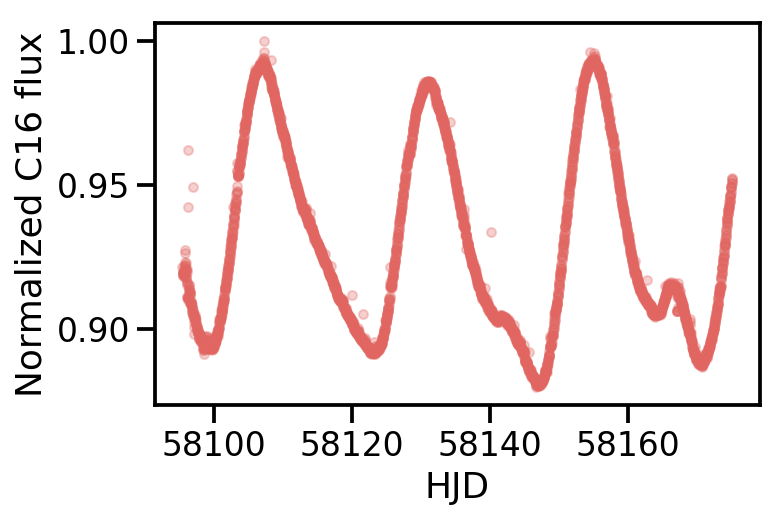

In [109]:
plt.plot(df16.time + 54833, (df16.flux / np.max(df16.flux)), '.', alpha=0.3, color='#E16560')
plt.xlabel("HJD")
plt.ylabel("Normalized C16 flux")
plt.tight_layout()
plt.savefig("../results/figs/C16_SFF_lightcurve.pdf", dpi=300, transparent=True);

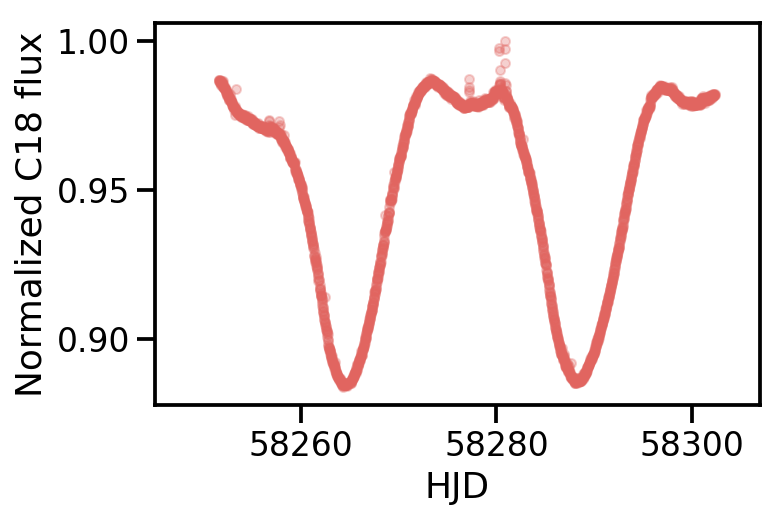

In [120]:
plt.plot(df18.time + 54833, (df18.flux / np.max(df18.flux)), '.', alpha=0.3, color='#E16560')
plt.xlabel("HJD")
plt.ylabel("Normalized C18 flux")
plt.xlim(58245, 58307)
plt.tight_layout()
plt.savefig("../results/figs/C18_SFF_lightcurve.pdf", dpi=300, transparent=True);

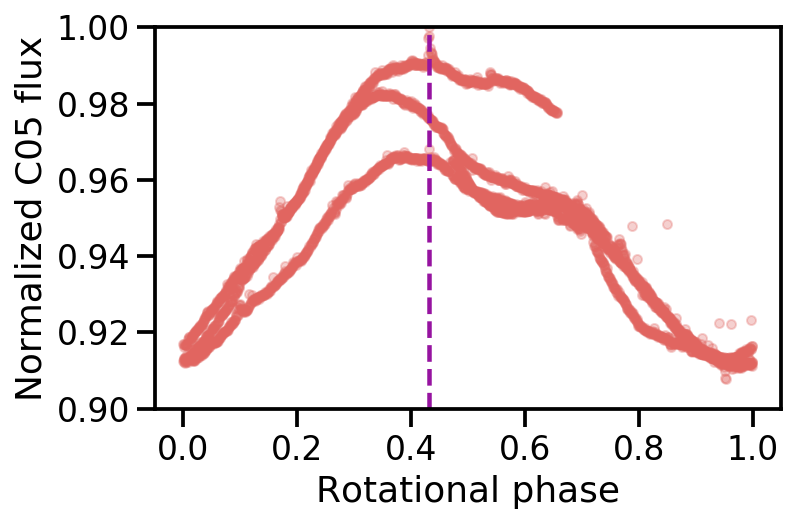

In [134]:
period = 23.5
obs = 57138.64
obsphase = np.mod(obs,period) / period
plt.plot(np.mod(df05.time + 54833, period) / period, (df05.flux / np.max(df05.flux)), '.', alpha=0.3, color='#E16560')
plt.axvline(obsphase, linestyle='dashed', color='#9613A0')
plt.xlabel("Rotational phase")
plt.ylabel("Normalized C05 flux")
plt.ylim(0.90, 1.00)
plt.tight_layout()
plt.savefig("../results/figs/C05_SFF_phasedlightcurve.pdf", dpi=300, transparent=True);

In [136]:
df = pd.read_csv('../sf/m118/output/mix_emcee/run02/models_ff-05_50_95.csv')

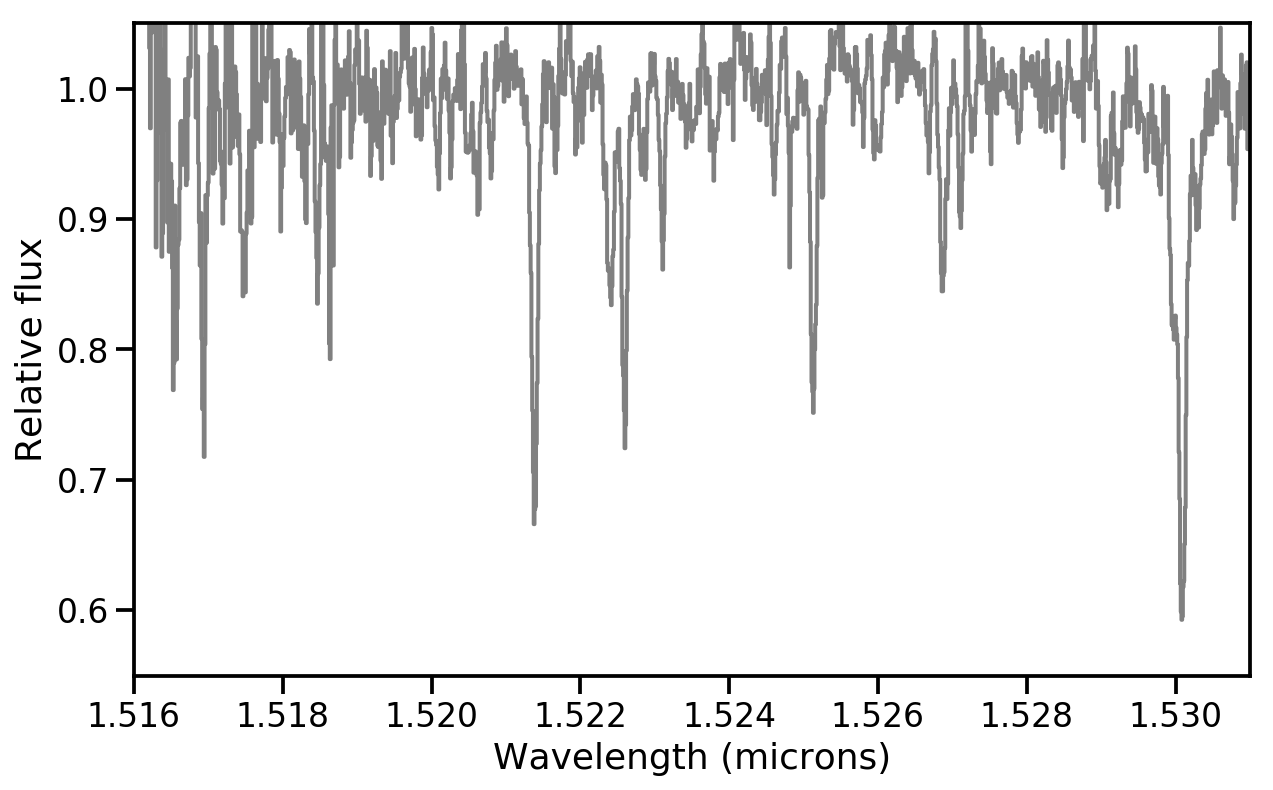

In [144]:
plt.figure(figsize=(10,6))
plt.step(df.wl / 10000, df.data * (1. / 0.29), 
         label='IGRINS spectrum', color='grey', linewidth=2)
plt.ylim(0.55,1.05)
plt.xlim(1.516,1.531)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.savefig("../results/figs/Order118_dataonly.pdf", dpi=300, transparent=True);

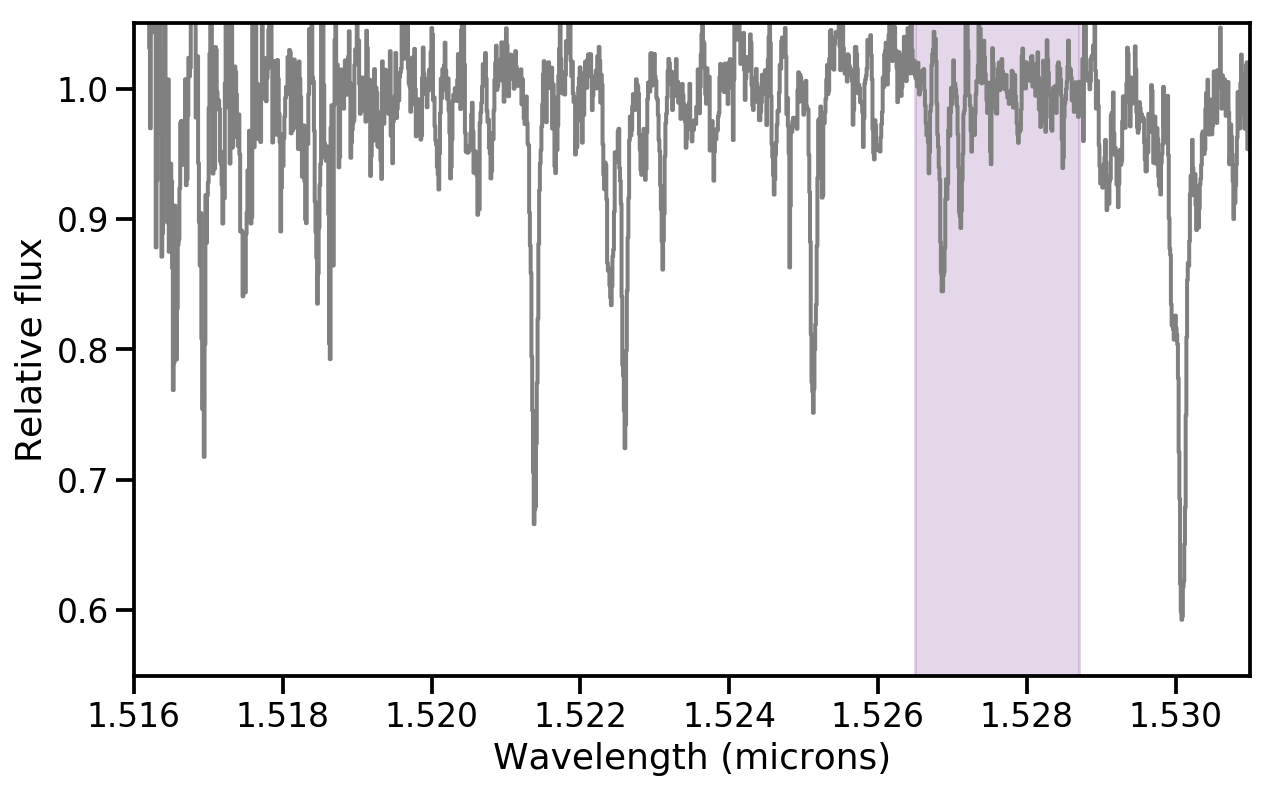

In [145]:
plt.figure(figsize=(10,6))
plt.step(df.wl / 10000, df.data * (1. / 0.29), 
         label='IGRINS spectrum', color='grey', linewidth=2)
plt.axvspan(1.5265,1.5287, color='#783891', alpha=0.2)
plt.ylim(0.55,1.05)
plt.xlim(1.516,1.531)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.savefig("../results/figs/Order118_dataonly_highlight.pdf", dpi=300, transparent=True);

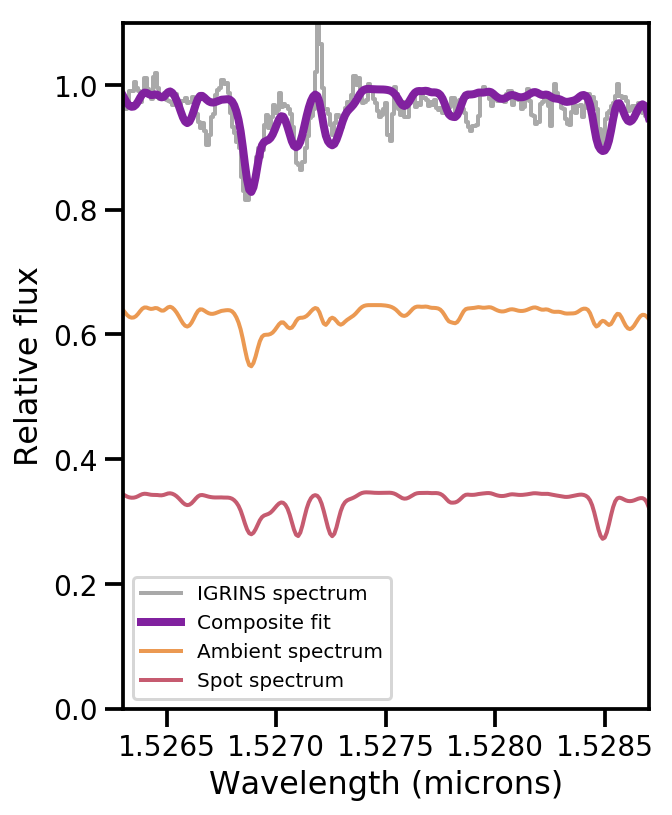

In [160]:
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=10)


plt.figure(figsize=(5,6))
plt.step(df.wl / 10000, df.data * (1. / 0.3), 
         label='IGRINS spectrum', color='#A9A9A9', linewidth=2)
plt.plot(df.wl / 10000, df.model_comp95* (1. / 0.3), 
         label='Composite fit', linewidth=4, color='#81219F')
plt.plot(df.wl / 10000, df.model_hot95* (1. / 0.3), 
         label='Ambient spectrum', color='#EB9952',linewidth=2)
plt.plot(df.wl / 10000, df.model_cool95* (1. / 0.3), 
         label='Spot spectrum', color='#C65B70', linewidth=2)
plt.xlim(1.5263,1.5287)
plt.ylim(0.0,1.1)
plt.xlabel("Wavelength (microns)")
plt.ylabel("Relative flux")
plt.legend(loc='best')
#plt.title("Spots on a Sub-subgiant")
plt.tight_layout()
plt.savefig("../results/figs/Spotspec_order118_new.pdf", dpi=300, transparent=True);